In [24]:
library(TDA)
library(repr)
library(aplpack)
library(stringr)
library(scatterplot3d)

packageVersion("TDA")

[1] ‘1.6.4’

#### Setup Ripser

In [25]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

#### Synthetic Data: Points on a circle

In [26]:
X <- circleUnif(n = 15)

#### Compute Vietoris-Rips and Alpha complexes

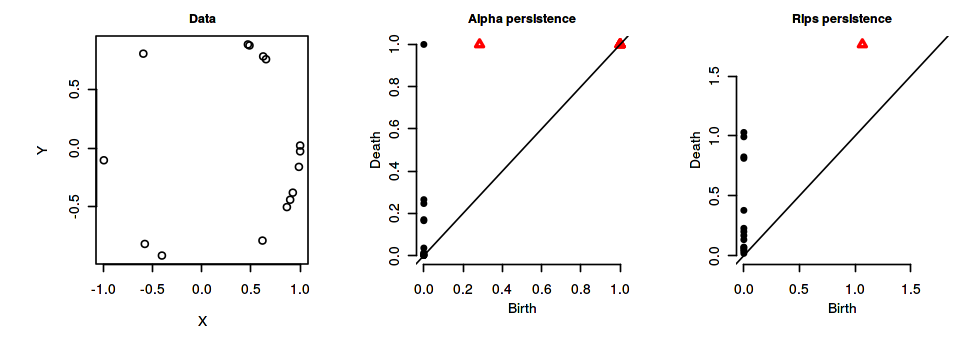

In [27]:
DiagAlphaCmplx = alphaComplexDiag(X, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(X, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(X, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

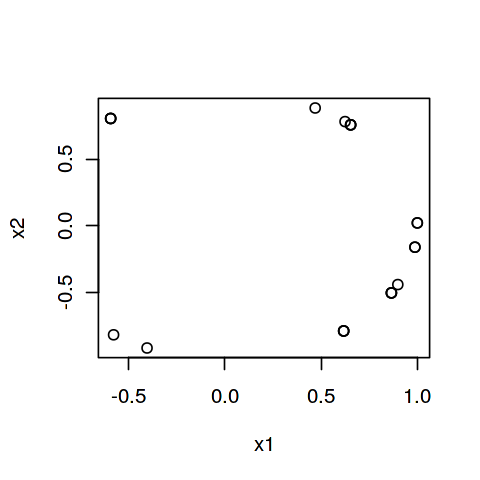

In [28]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [29]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 21

In [30]:
str(DiagAlphaCmplx$cycleLocation)

List of 21
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] 0.653 0.865 0.757 -0.502
 $ : num [1:2, 1, 1:2] 0.9997 0.865 0.0224 -0.5017
 $ : num [1:2, 1, 1:2] 0.9872 0.9997 -0.1594 0.0224
 $ : num [1:2, 1, 1:2] 0.617 0.865 -0.787 -0.502
 $ : num [1:2, 1, 1:2] -0.405 0.617 -0.914 -0.787
 $ : num [1:2, 1, 1:2] -0.594 -0.405 0.805 -0.914
 $ : num [1:2, 1, 1:2] -0.579 -0.405 -0.816 -0.914
 $ : num [1:2, 1, 1:2] 0.624 0.653 0.781 0.757
 $ : num [1:2, 1, 1:2] 0.469 0.624 0.883 0.781
 $ : num [1:2, 1, 1:2] -0.995 -0.579 -0.103 -0.816
 $ : num [1:2, 1, 1:2] 0.898 0.865 -0.439 -0.502
 $ : num [1:2, 1, 1:2] 0.485 0.469 0.875 0.883
 $ : num [1:2, 1, 1:2] 0.925 0.898 -0.379 -0.439
 $ : num [1:2, 1, 1:2] 0.9996 0.9997 -0.0271 0.0224
 $ : num [1:15, 1:2, 1:2] -0.594 0.617 -0.594 -0.579 0.653 ...
 $ : num [1:4, 1:2, 1:2] 1 0.987 0.987 1 0.925 ...
 $ : num [1:3, 1:2, 1:2] 0.617 0.617 -0.405 -0.579 -0.405 ...
 $ : num [1:9, 1:2, 1:2] -0.579 1 -0.594 -0.594 -0.579 ...
 $ : num [1:5, 1:2, 1:2] 0.653 -0.594 

In [31]:
DiagAlphaCmplx

$diagram
      dimension     Birth        Death
 [1,]         0 0.0000000          Inf
 [2,]         0 0.0000000 1.649977e-01
 [3,]         0 0.0000000 1.299331e-02
 [4,]         0 0.0000000 4.411299e-03
 [5,]         0 0.0000000 3.571729e-02
 [6,]         0 0.0000000 2.649850e-01
 [7,]         0 0.0000000 2.462122e-01
 [8,]         0 0.0000000 1.000448e-02
 [9,]         0 0.0000000 3.571934e-04
[10,]         0 0.0000000 7.015903e-03
[11,]         0 0.0000000 1.702417e-01
[12,]         0 0.0000000 1.249966e-03
[13,]         0 0.0000000 8.239465e-05
[14,]         0 0.0000000 1.099214e-03
[15,]         0 0.0000000 6.136806e-04
[16,]         1 0.2838527 1.000000e+00
[17,]         1 1.0000000 1.000000e+00
[18,]         1 1.0000000 1.000000e+00
[19,]         1 1.0000000 1.000000e+00
[20,]         1 1.0000000 1.000000e+00
[21,]         1 1.0000000 1.000000e+00

$birthLocation
              x1          x2
 [1,]  0.8650239 -0.50173063
 [2,]  0.6532064  0.75717987
 [3,]  0.9997491  0.02240159
 

#### Plot merging events for connected components (dim 0 homology)

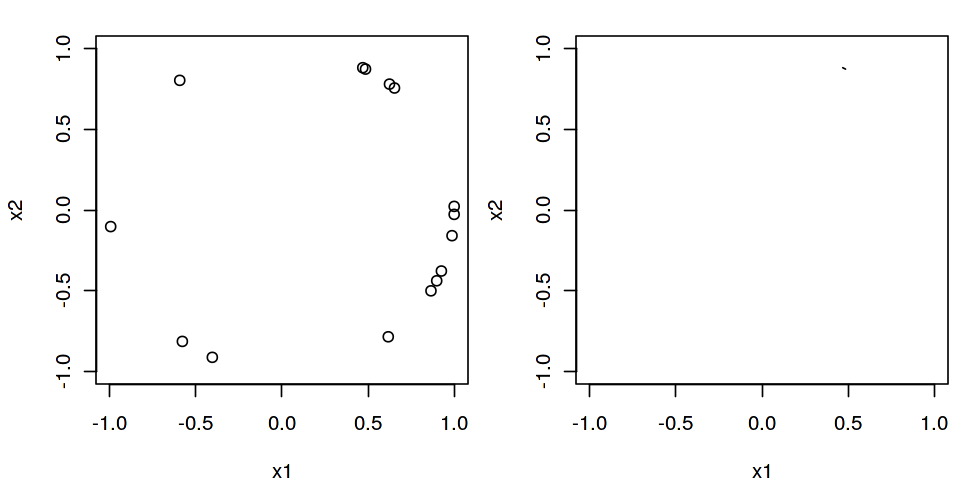

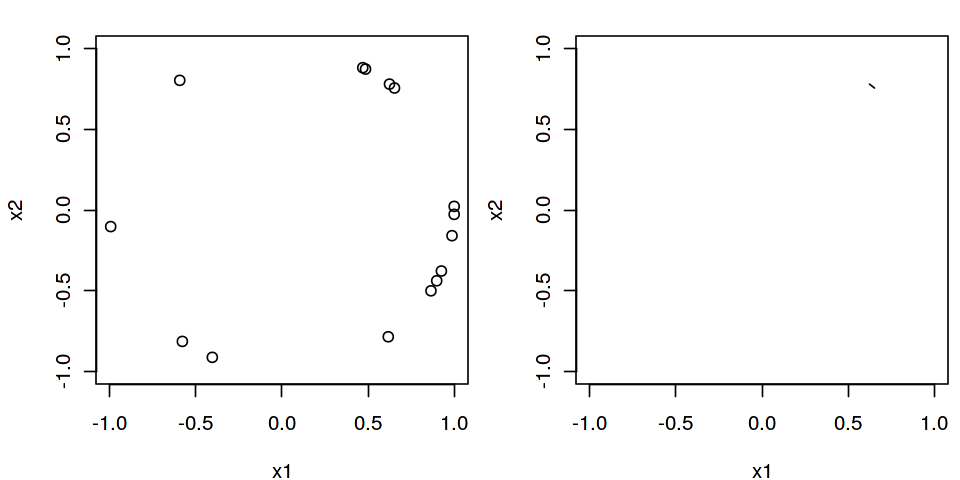

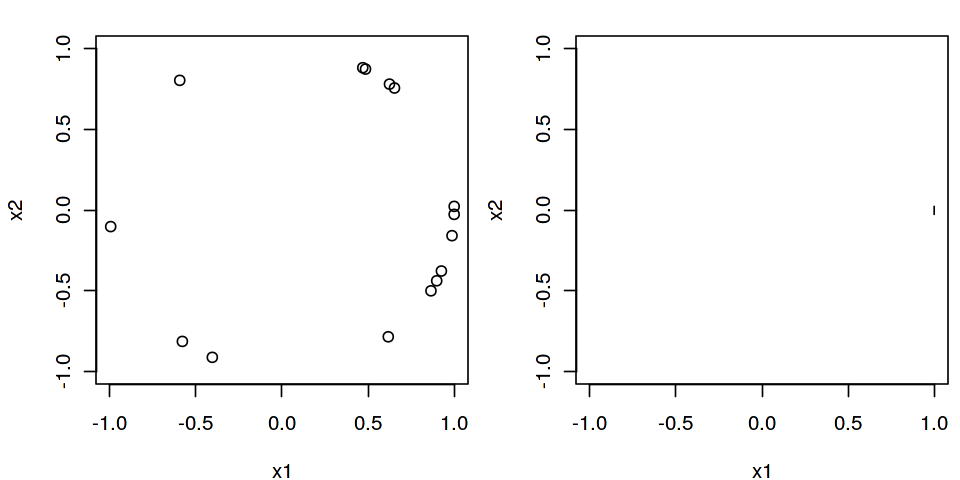

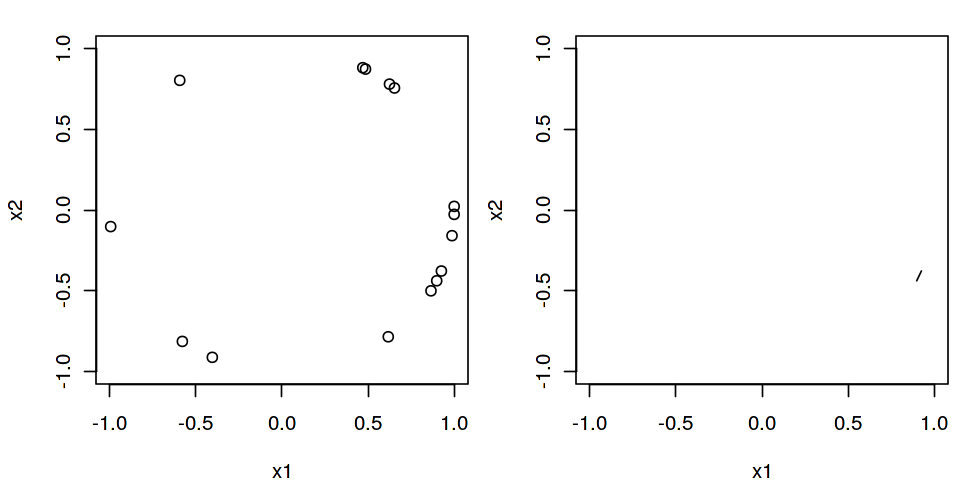

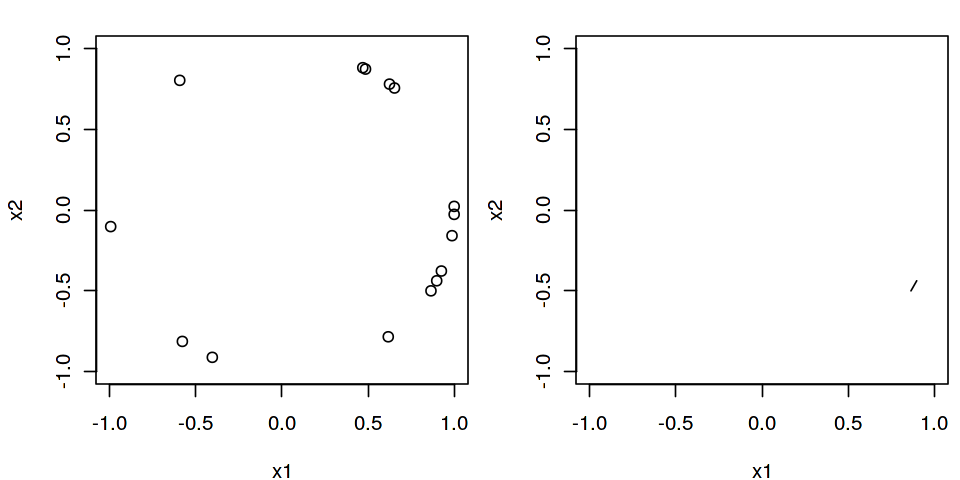

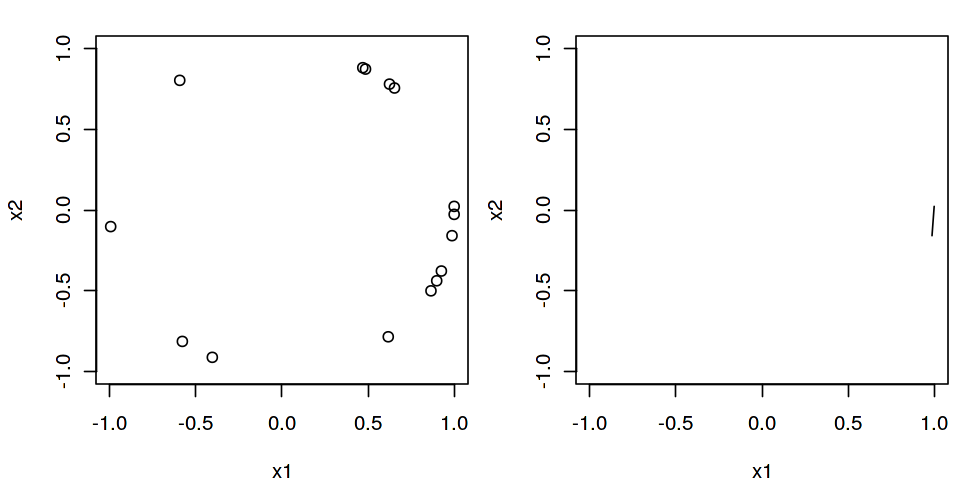

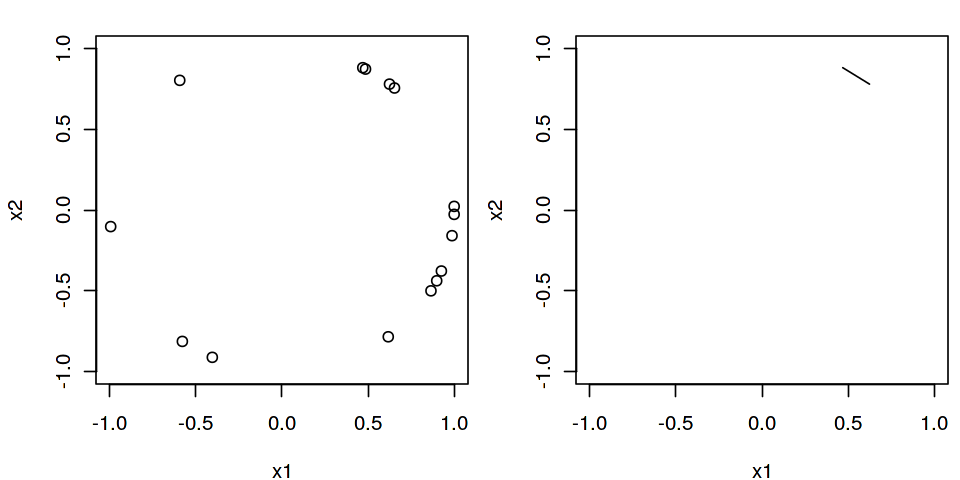

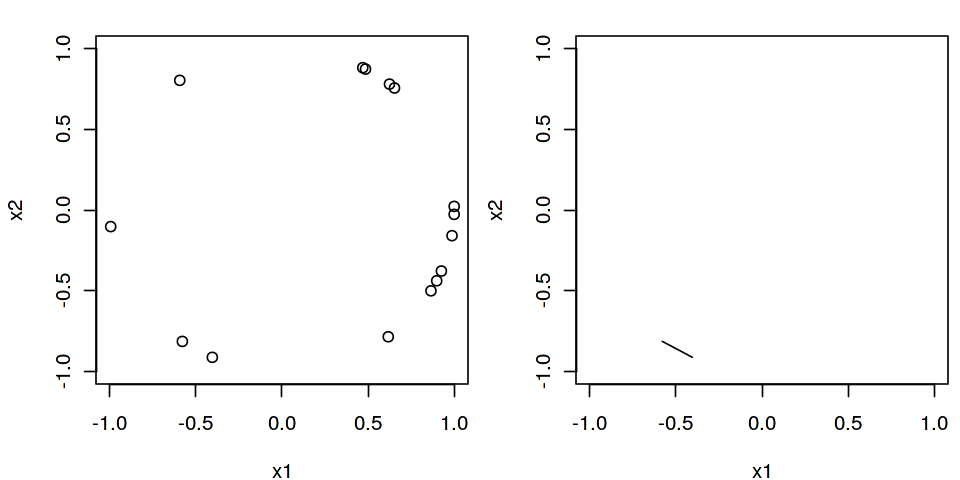

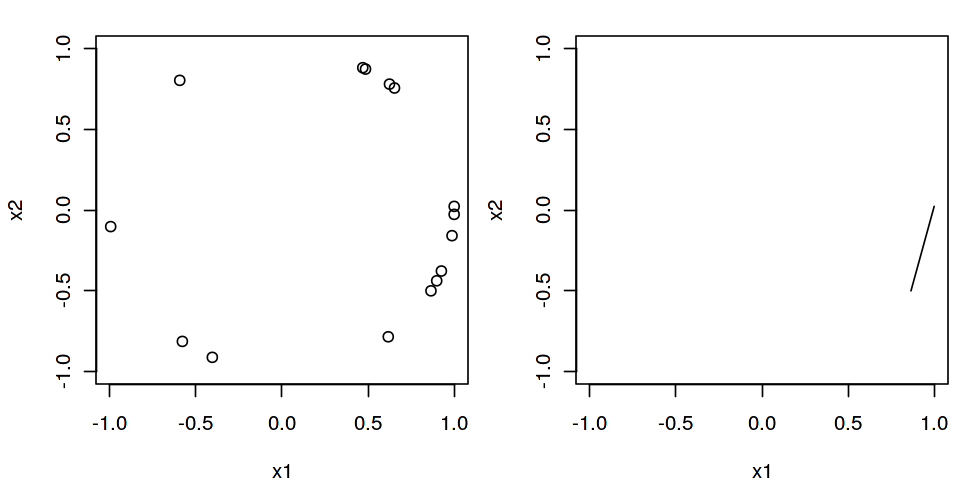

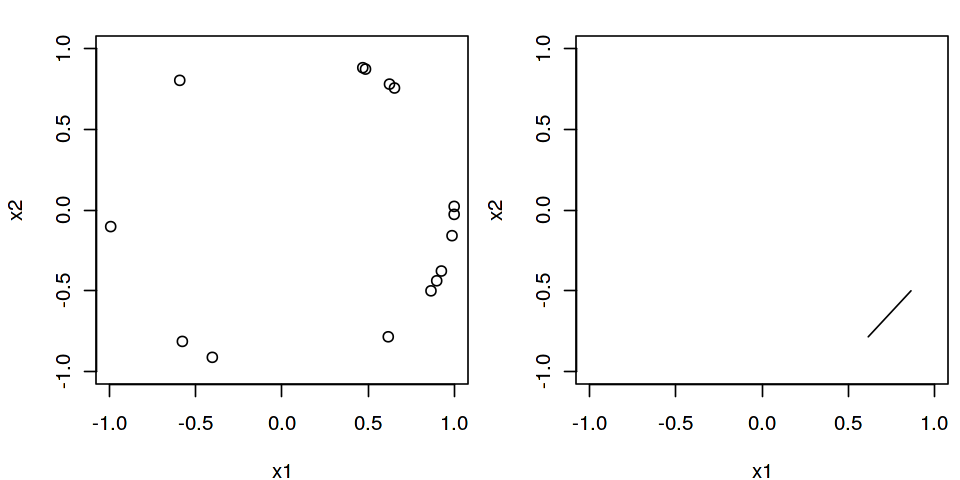

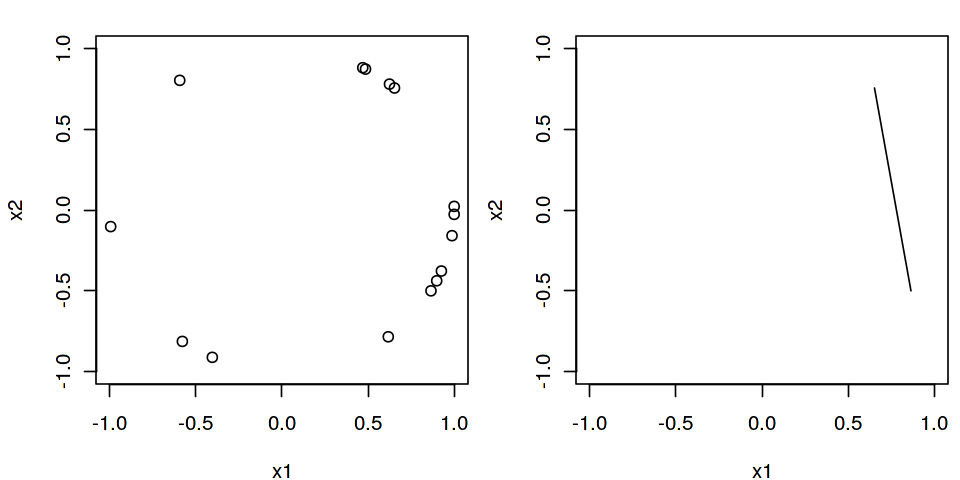

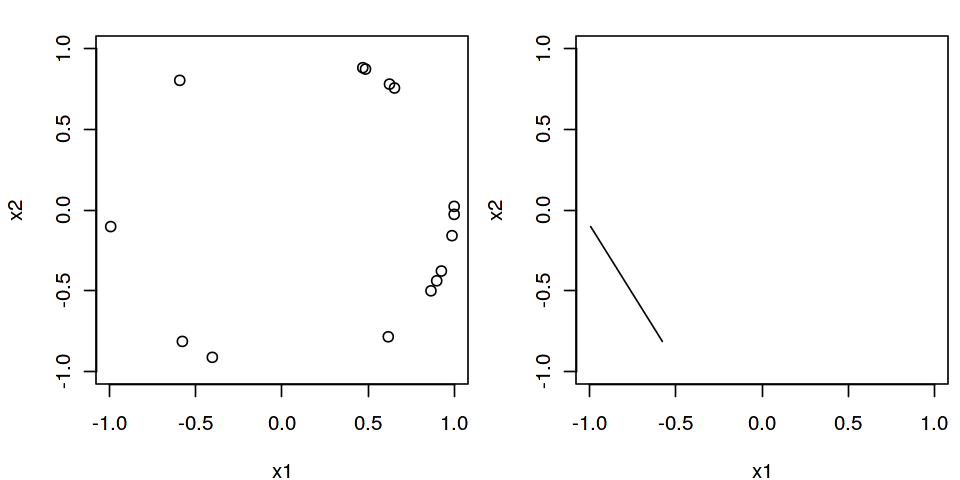

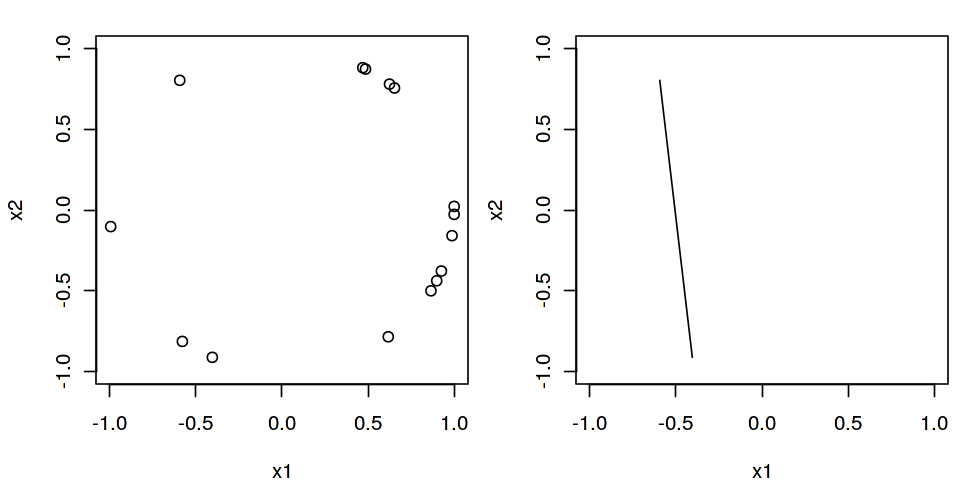

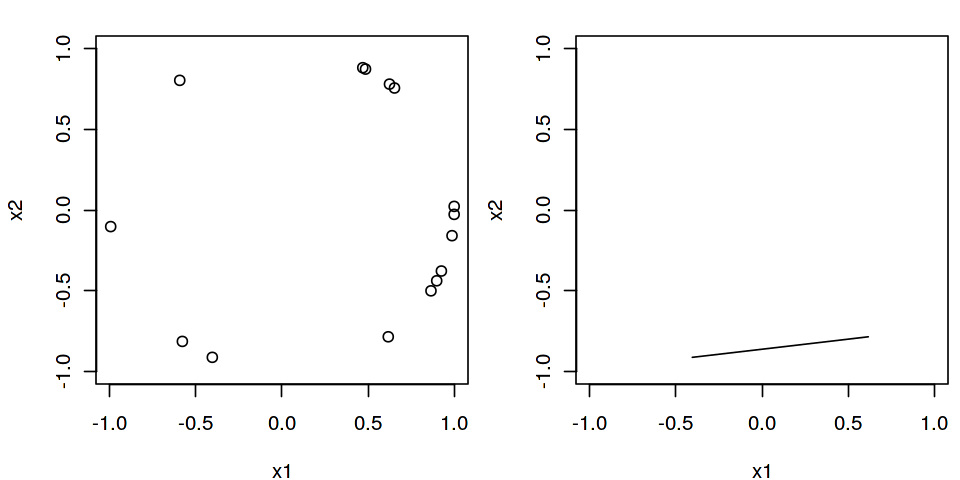

In [32]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 1){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Plot loop closing events (dim 1 homology)

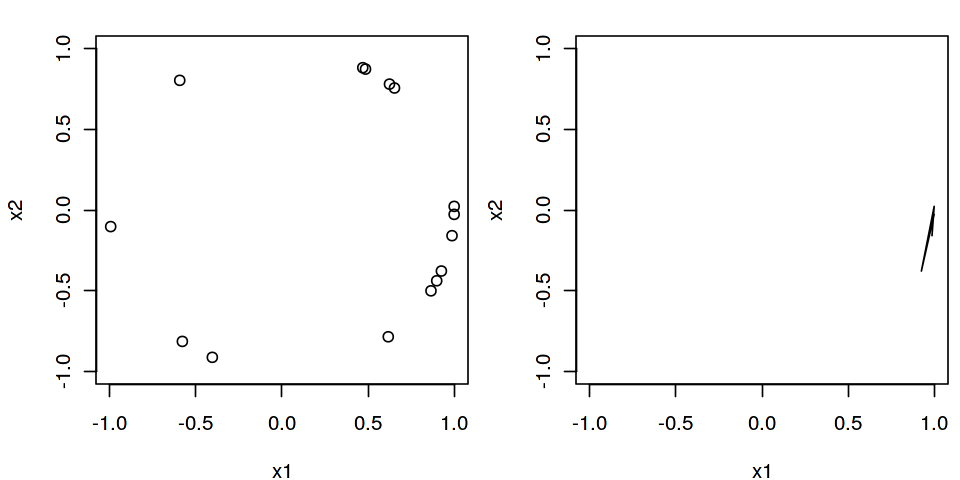

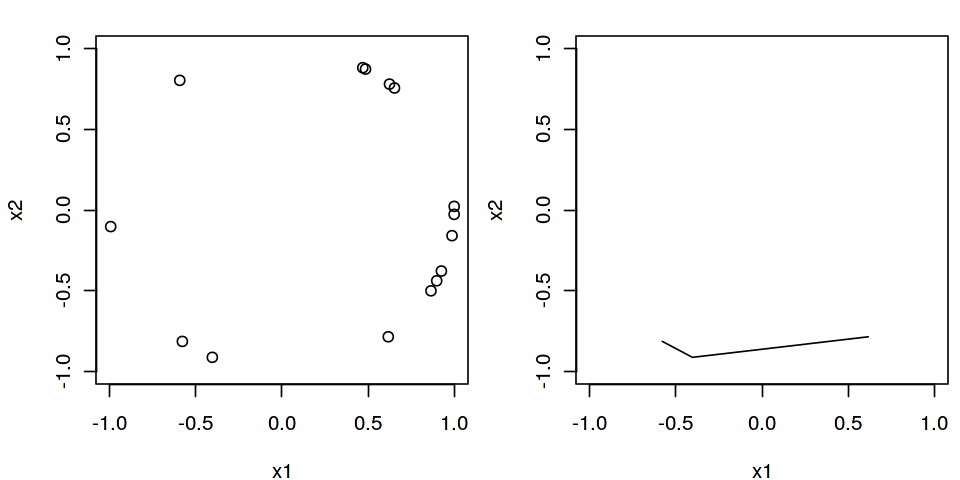

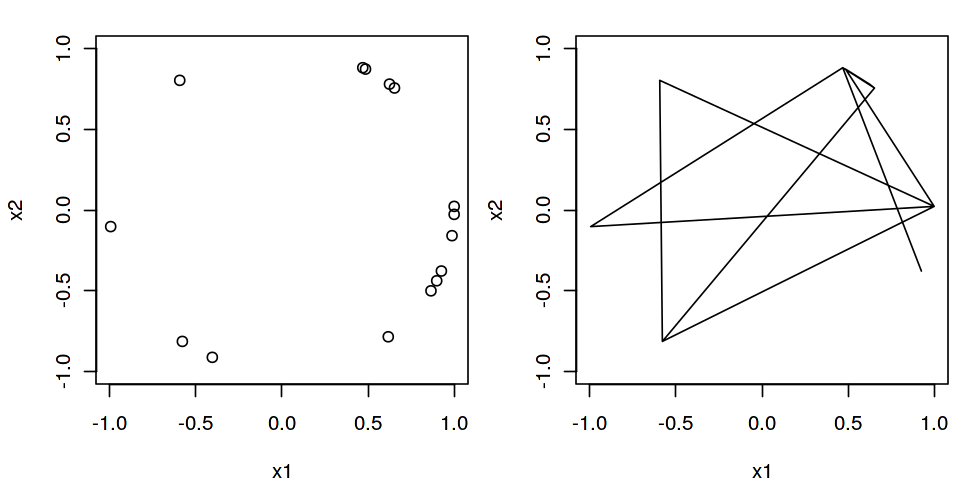

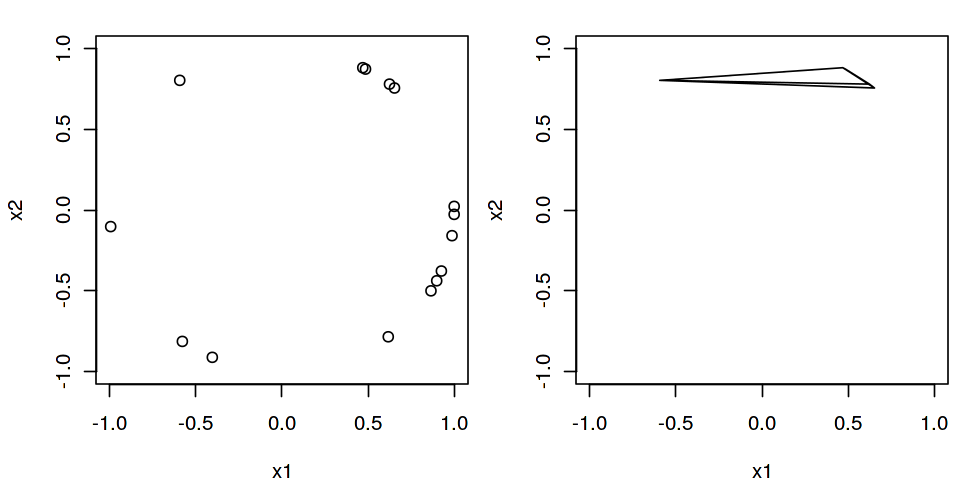

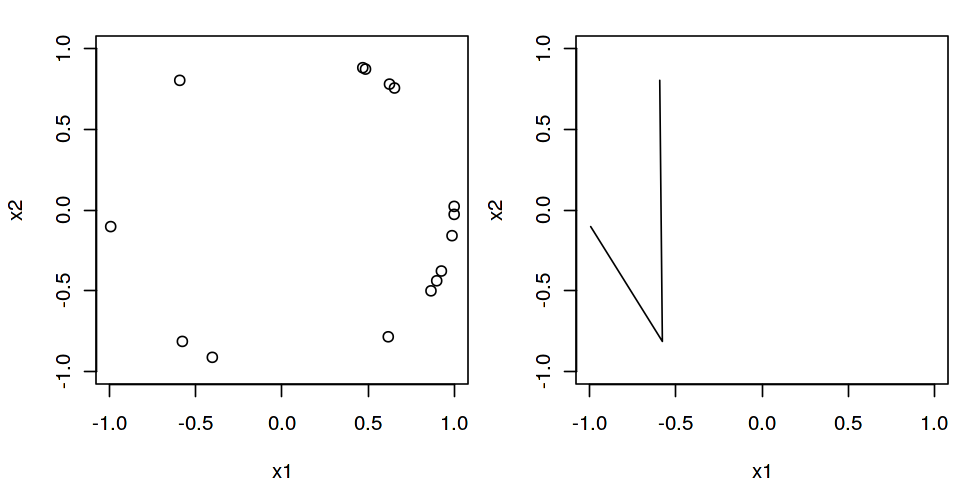

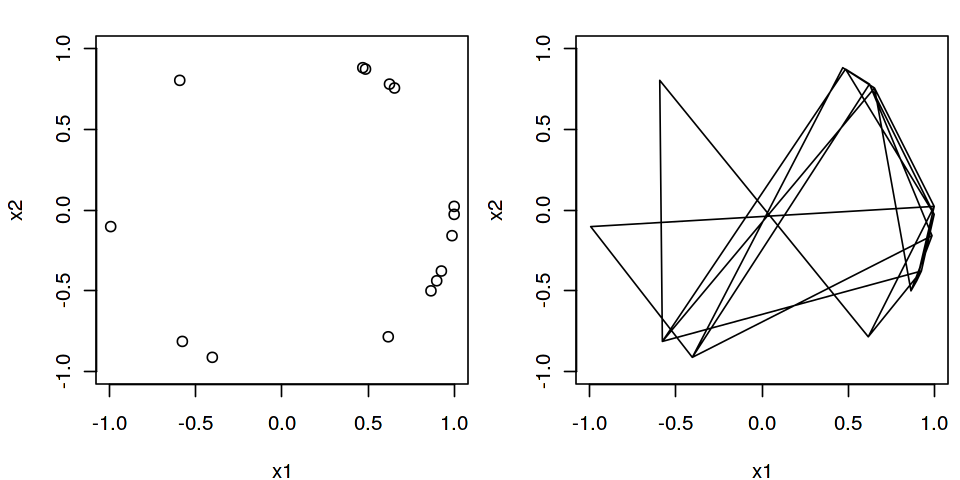

In [33]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Synthetic Data: Points located on two circles

In [34]:
Circle1 <- circleUnif(60)
Circle2 <- circleUnif(60, r = 2) + 3
Circles <- rbind(Circle1, Circle2)

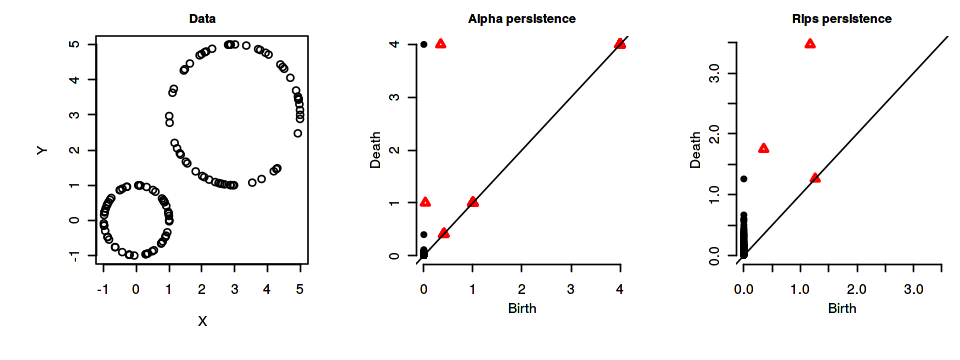

In [35]:
DiagAlphaCmplx = alphaComplexDiag(Circles, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(Circles, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

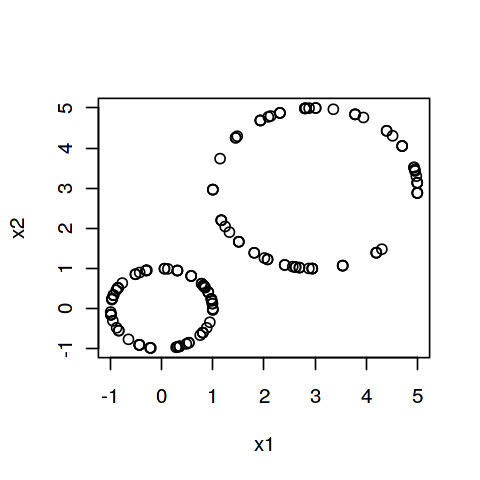

In [36]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [37]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 152

In [38]:
str(DiagAlphaCmplx$cycleLocation)

List of 152
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.887 -0.855 0.461 0.518
 $ : num [1:2, 1, 1:2] -0.435 -0.887 -0.9 0.461
 $ : num [1:2, 1, 1:2] -0.301 -0.855 0.954 0.518
 $ : num [1:2, 1, 1:2] -0.989 -0.887 -0.148 0.461
 $ : num [1:2, 1, 1:2] 0.347 -0.301 -0.938 0.954
 $ : num [1:2, 1, 1:2] 0.911 0.347 0.413 -0.938
 $ : num [1:2, 1, 1:2] 0.0546 0.9109 0.9985 0.4126
 $ : num [1:2, 1, 1:2] -0.838 -0.989 -0.545 -0.148
 $ : num [1:2, 1, 1:2] 0.3081 0.0546 0.9514 0.9985
 $ : num [1:2, 1, 1:2] -0.224 -0.435 -0.975 -0.9
 $ : num [1:2, 1, 1:2] 0.31 0.347 -0.951 -0.938
 $ : num [1:2, 1, 1:2] 0.97 0.911 0.243 0.413
 $ : num [1:2, 1, 1:2] -0.648 -0.435 -0.761 -0.9
 $ : num [1:2, 1, 1:2] 0.9997 0.97 -0.0263 0.2432
 $ : num [1:2, 1, 1:2] 0.942 0.347 -0.337 -0.938
 $ : num [1:2, 1, 1:2] -0.512 -0.301 0.859 0.954
 $ : num [1:2, 1, 1:2] -0.43 -0.512 0.903 0.859
 $ : num [1:2, 1, 1:2] -0.211 -0.224 -0.978 -0.975
 $ : num [1:2, 1, 1:2] -0.769 -0.855 0.639 0.518
 $ : num [1:2, 1, 1:2] 1 0.9996

In [39]:
DiagAlphaCmplx

$diagram
       dimension      Birth        Death
  [1,]         0 0.00000000          Inf
  [2,]         0 0.00000000 1.082235e-03
  [3,]         0 0.00000000 1.961829e-02
  [4,]         0 0.00000000 2.864290e-02
  [5,]         0 0.00000000 1.390157e-02
  [6,]         0 0.00000000 2.993932e-02
  [7,]         0 0.00000000 2.489323e-02
  [8,]         0 0.00000000 1.952179e-02
  [9,]         0 0.00000000 8.582344e-03
 [10,]         0 0.00000000 9.224518e-03
 [11,]         0 0.00000000 1.211437e-02
 [12,]         0 0.00000000 3.728754e-04
 [13,]         0 0.00000000 8.045002e-03
 [14,]         0 0.00000000 1.616203e-02
 [15,]         0 0.00000000 3.588180e-03
 [16,]         0 0.00000000 2.114477e-02
 [17,]         0 0.00000000 4.789054e-03
 [18,]         0 0.00000000 1.418317e-03
 [19,]         0 0.00000000 4.496719e-05
 [20,]         0 0.00000000 1.777085e-03
 [21,]         0 0.00000000 1.477794e-04
 [22,]         0 0.00000000 1.402580e-05
 [23,]         0 0.00000000 1.121919e-02
 [24,] 

#### Plot loop closing events

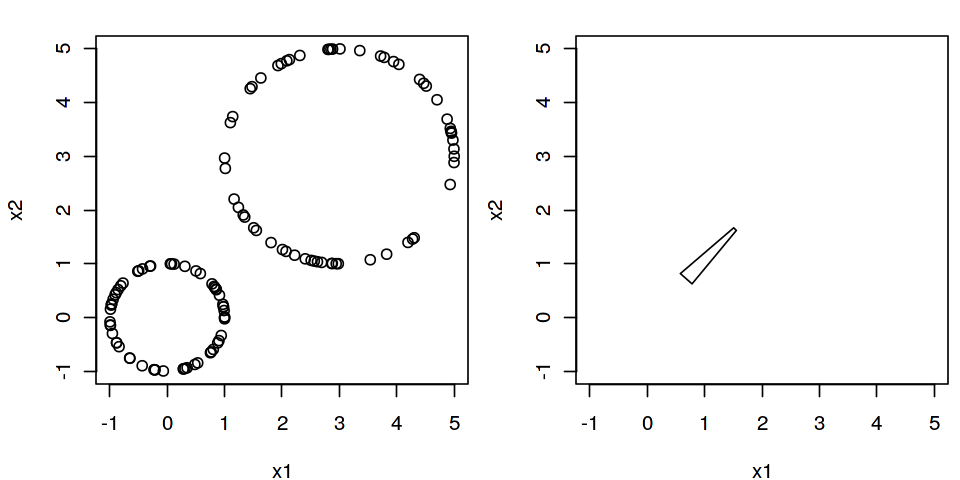

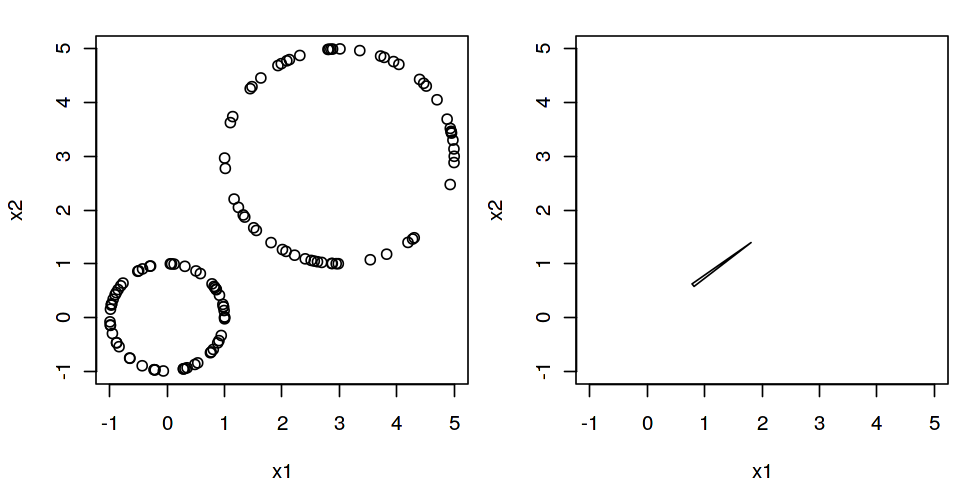

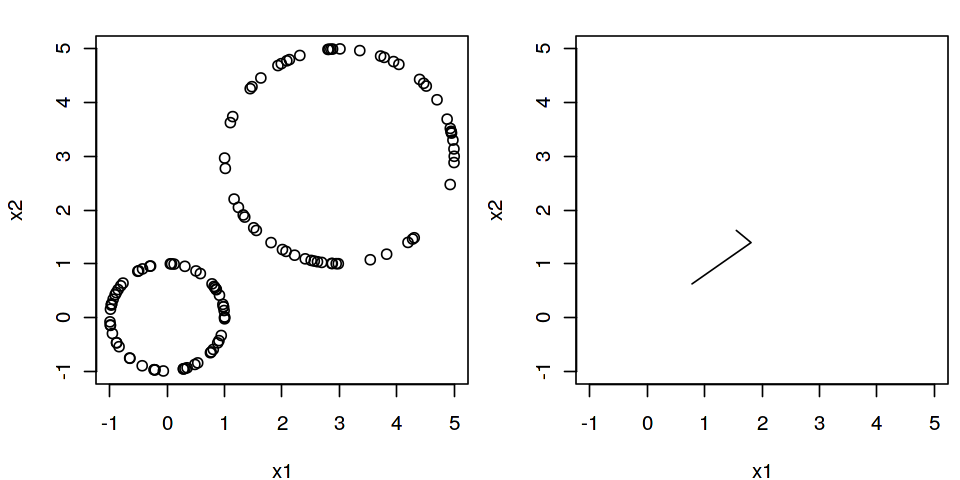

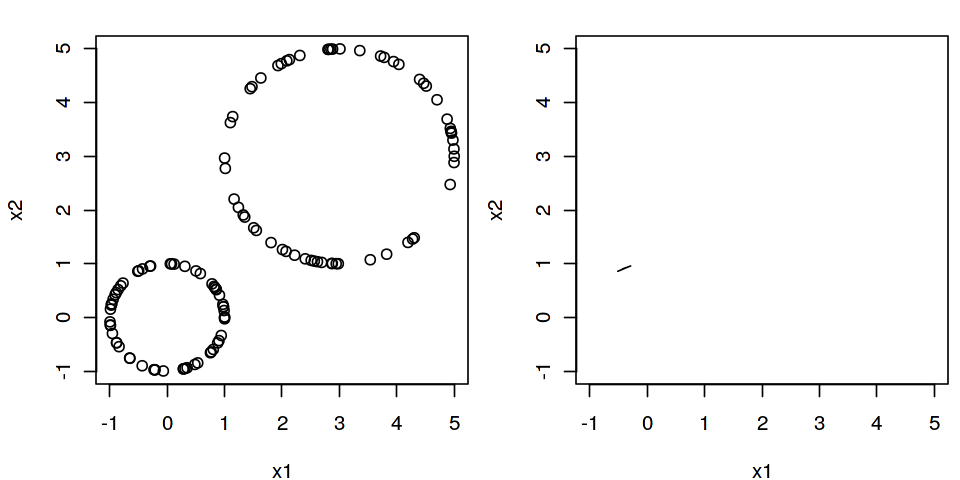

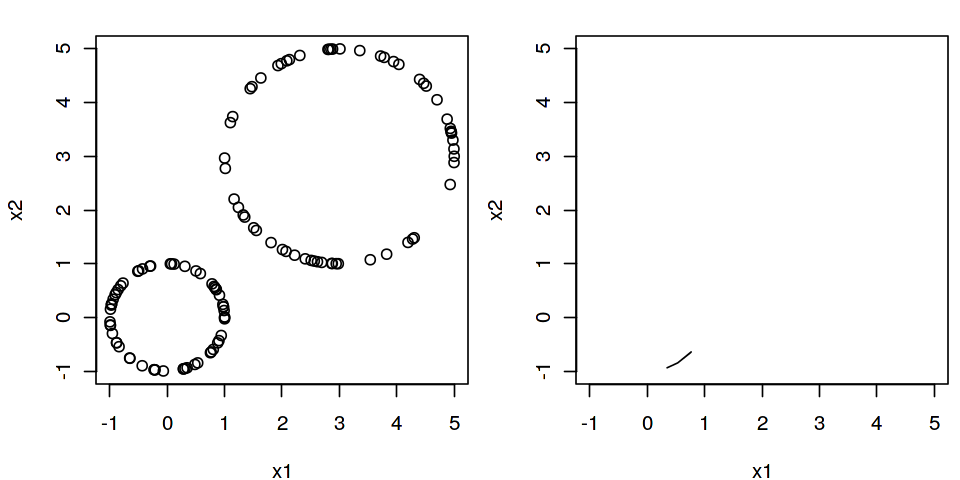

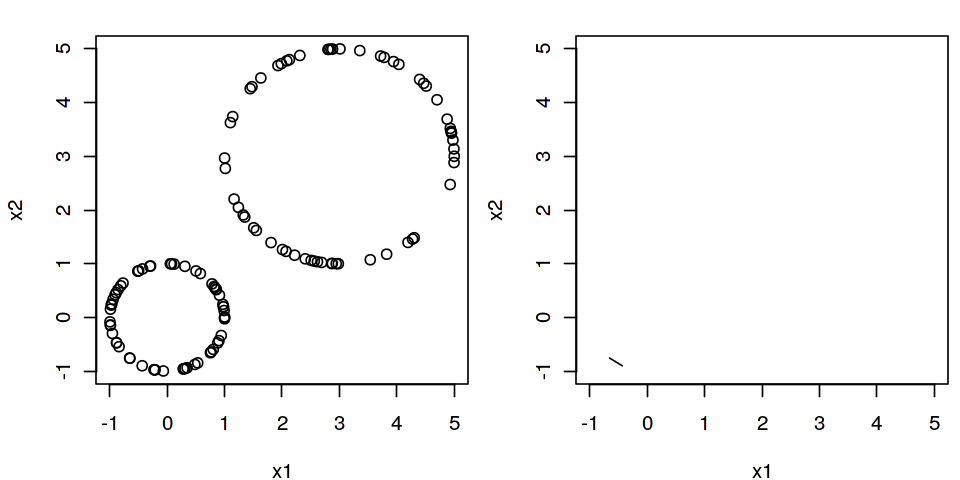

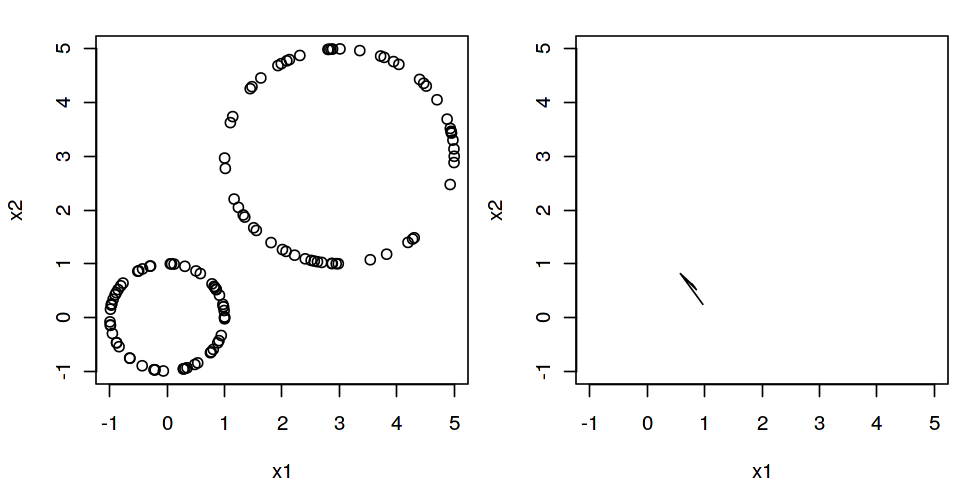

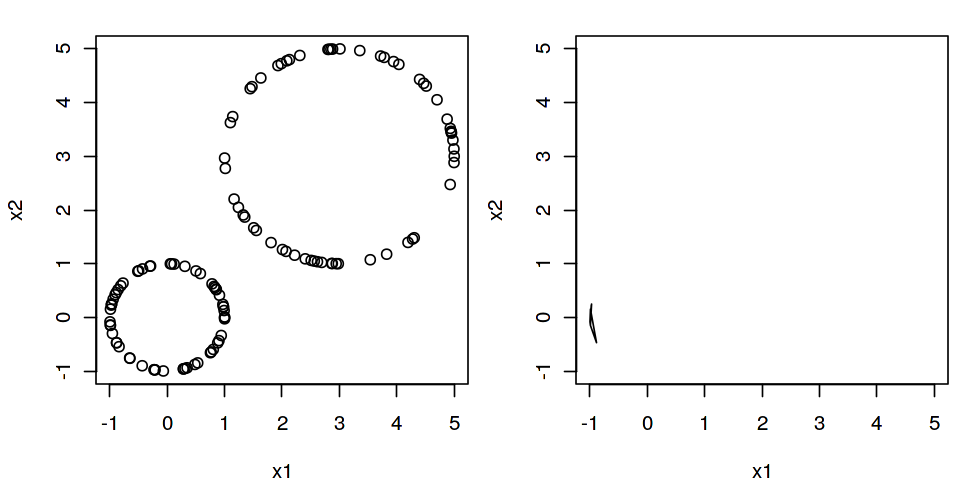

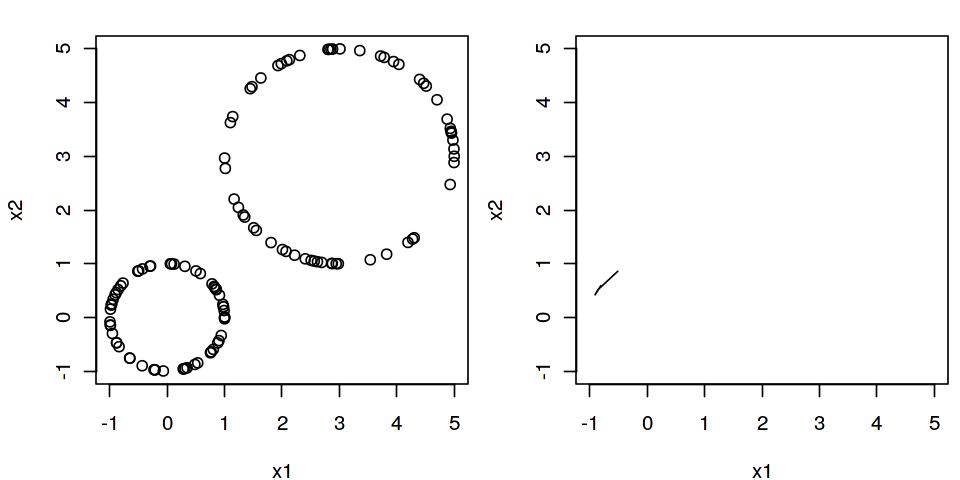

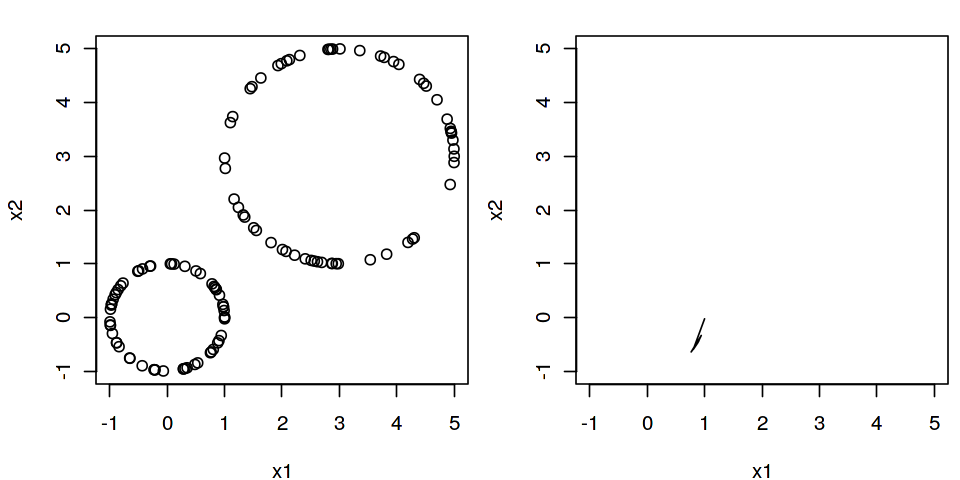

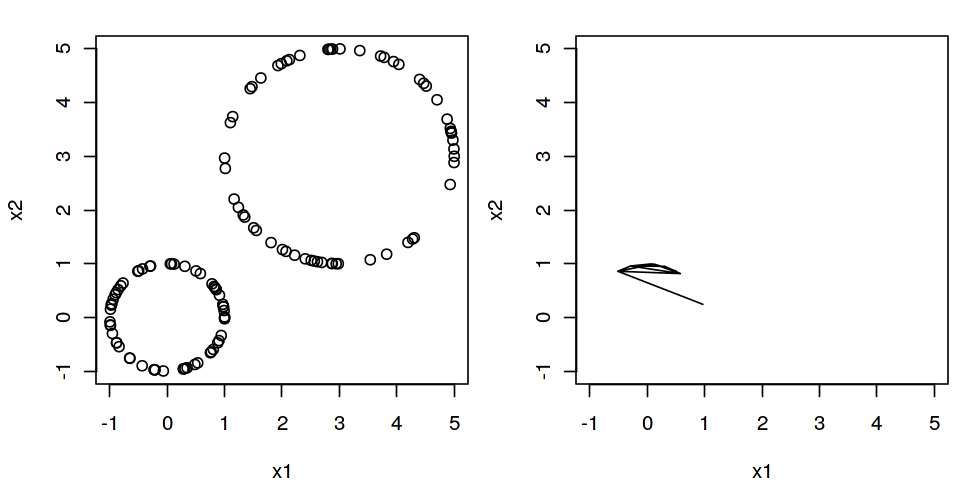

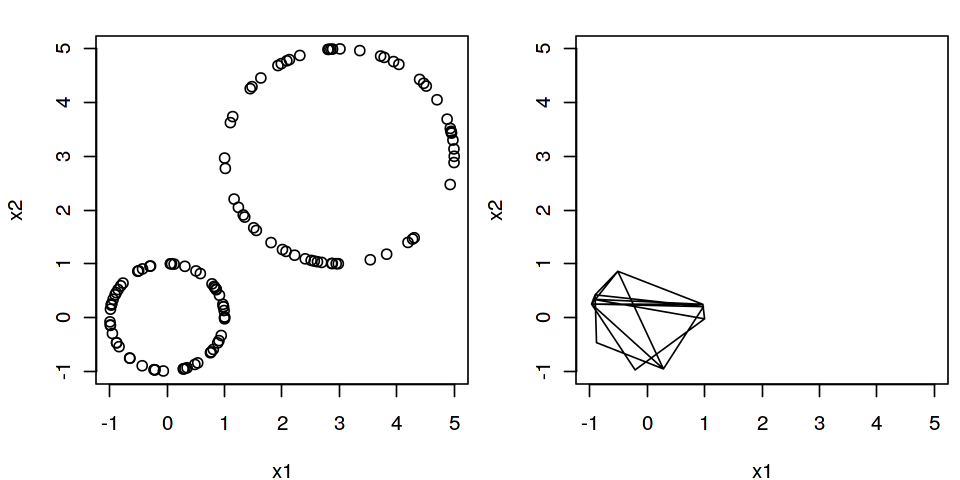

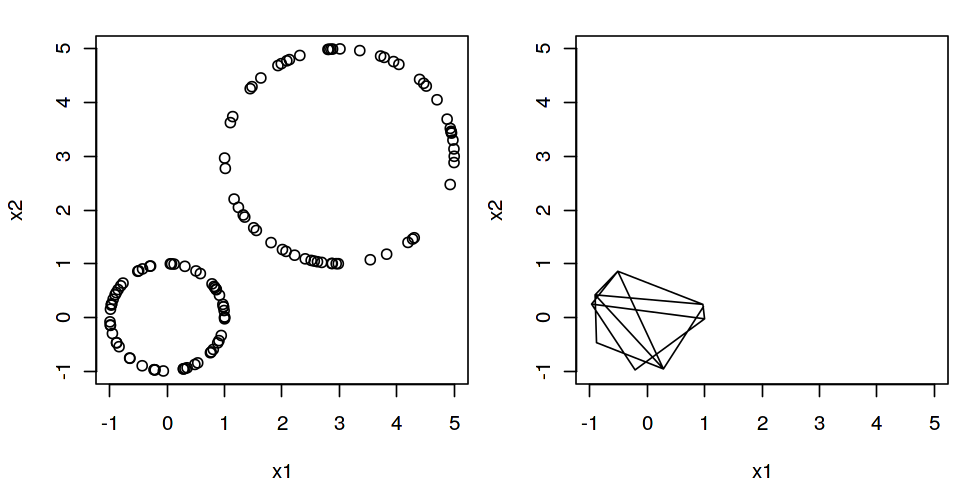

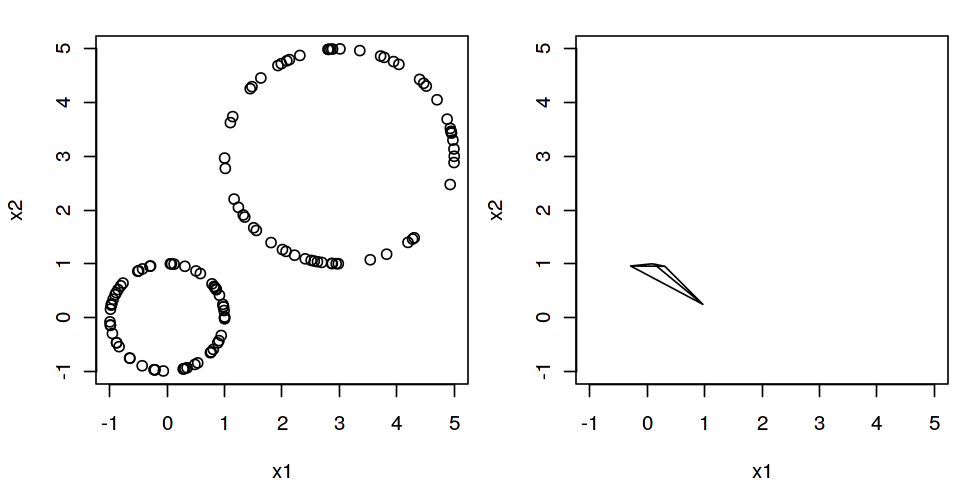

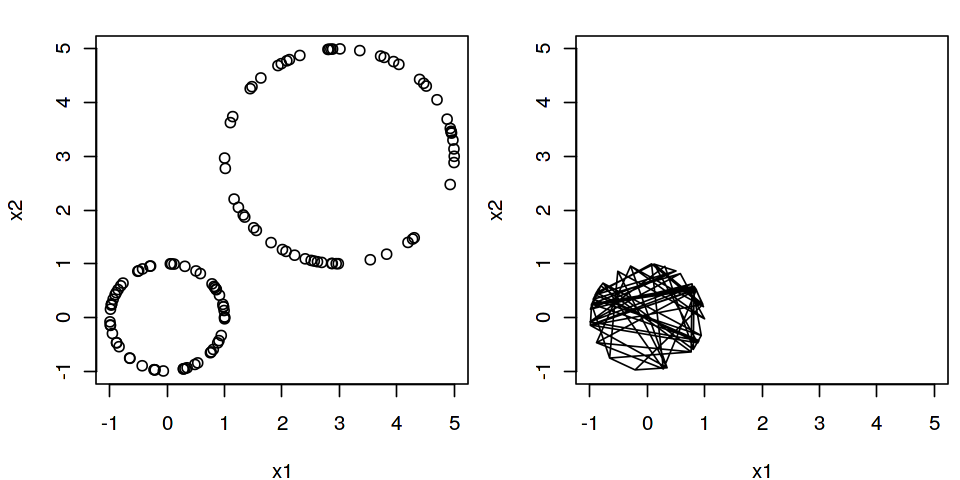

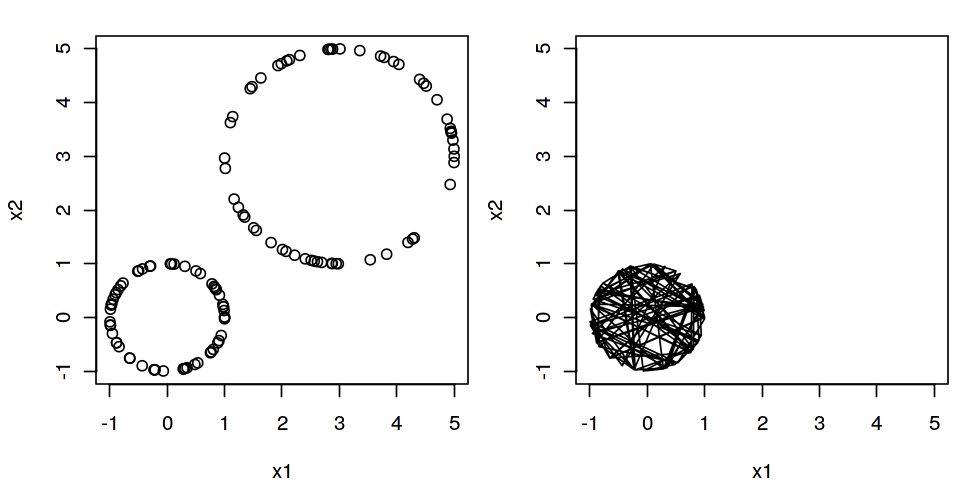

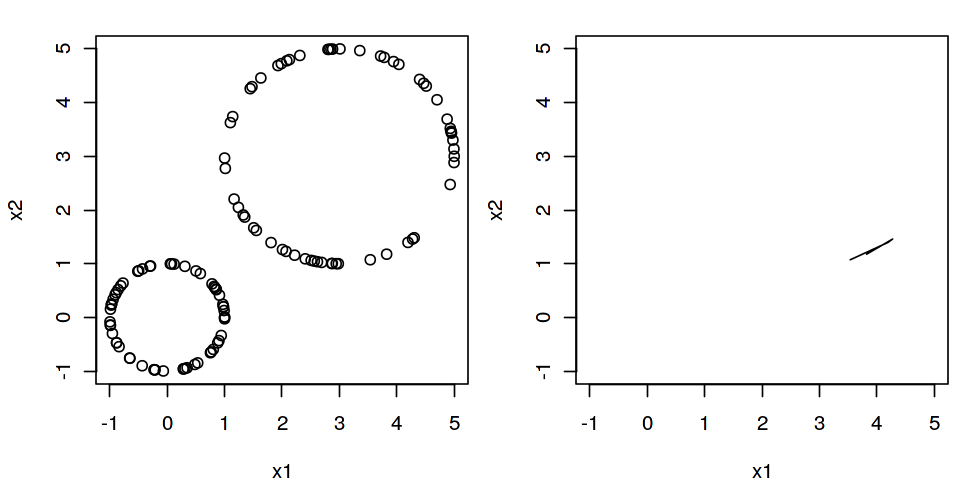

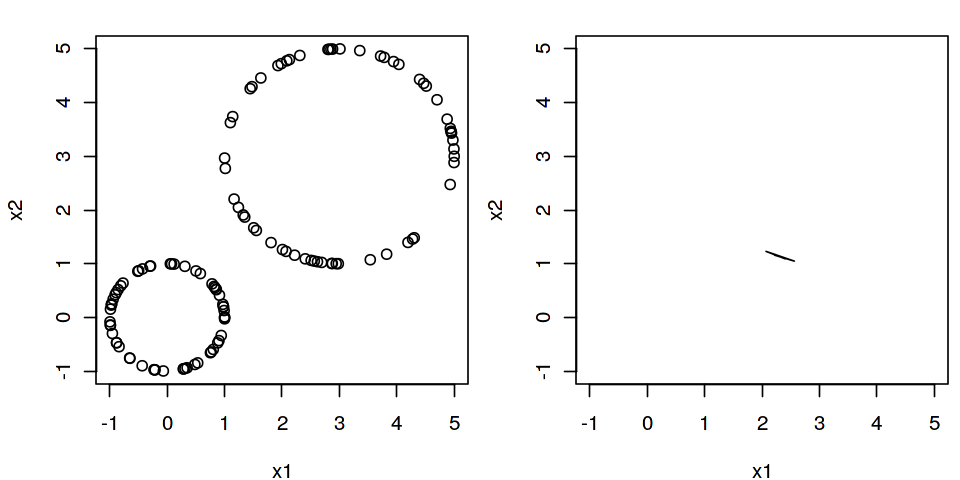

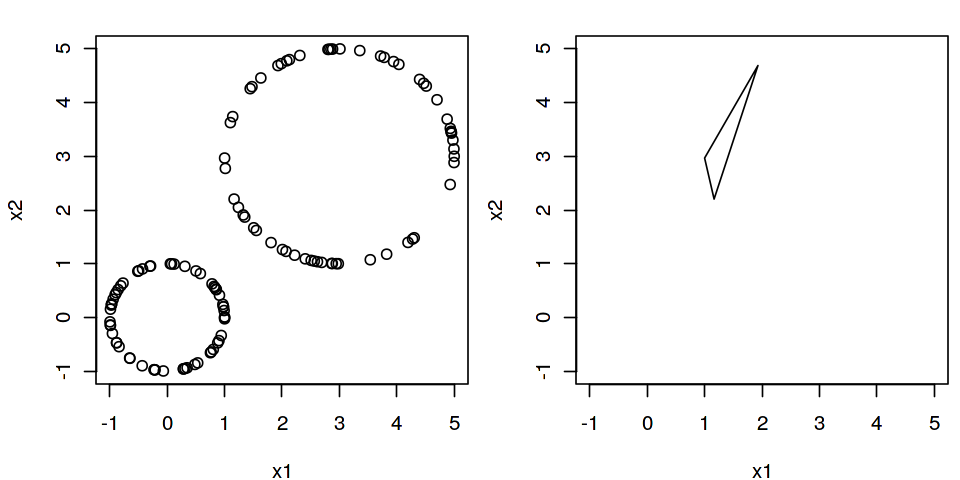

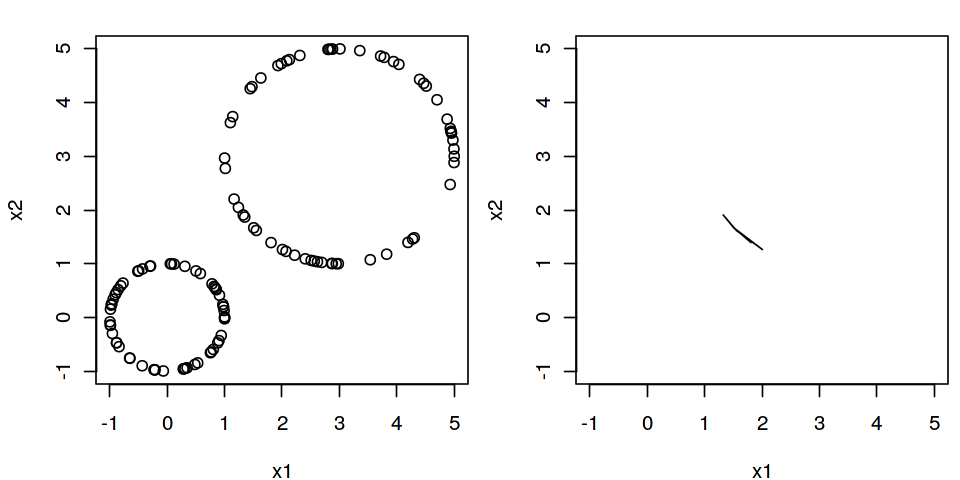

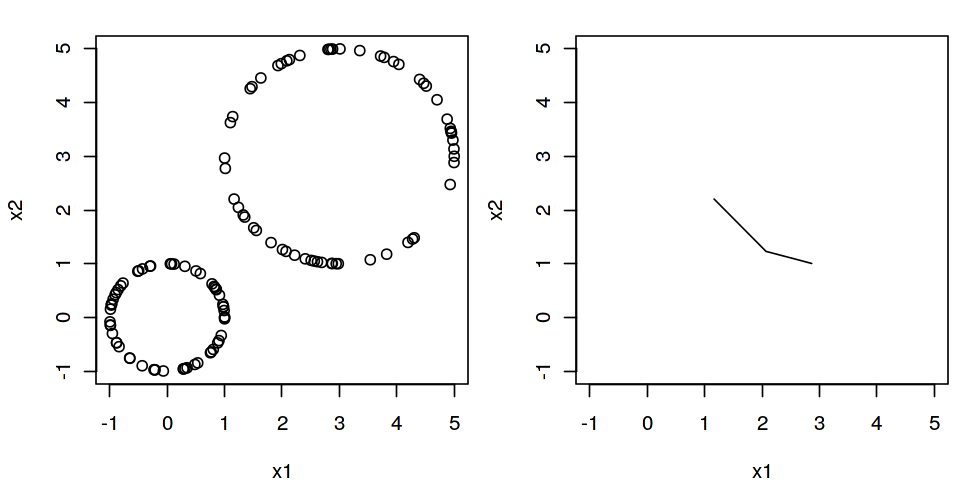

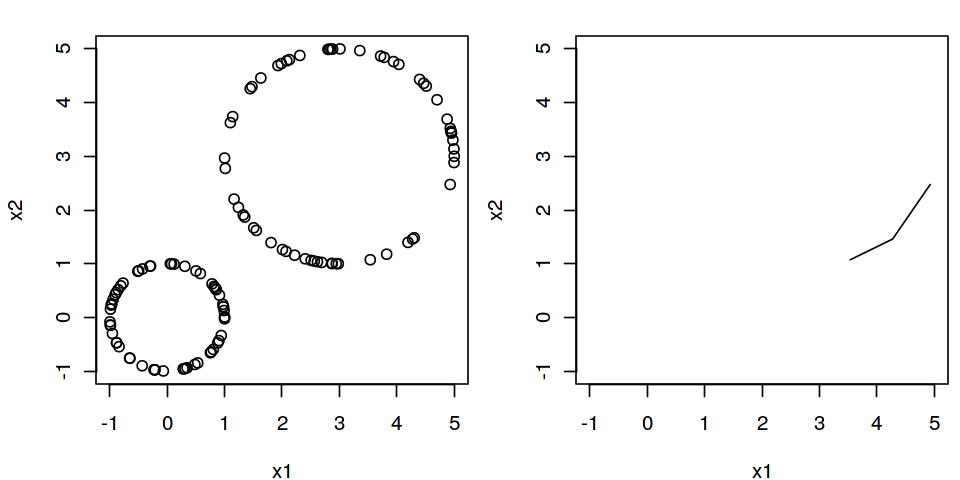

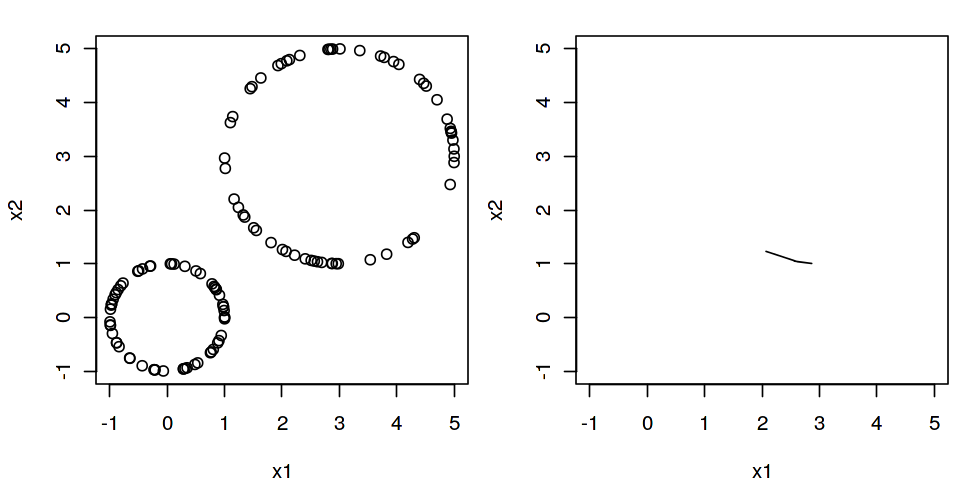

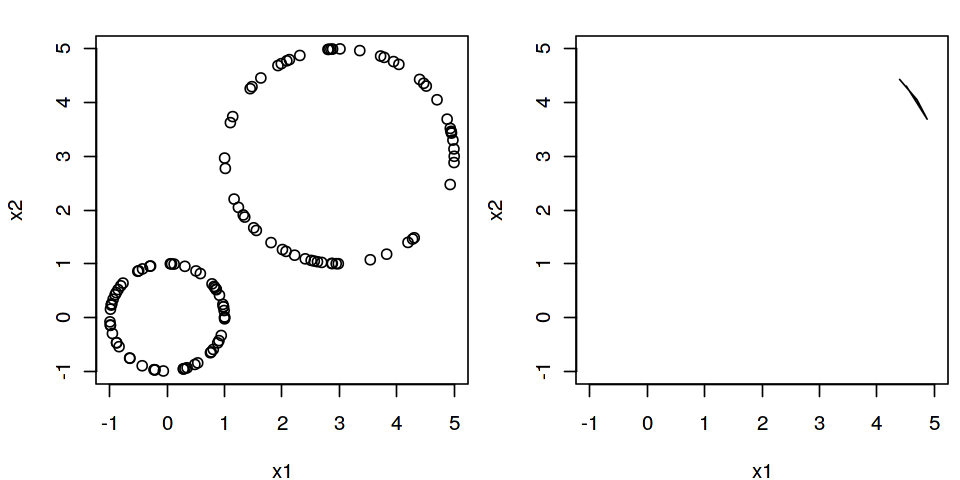

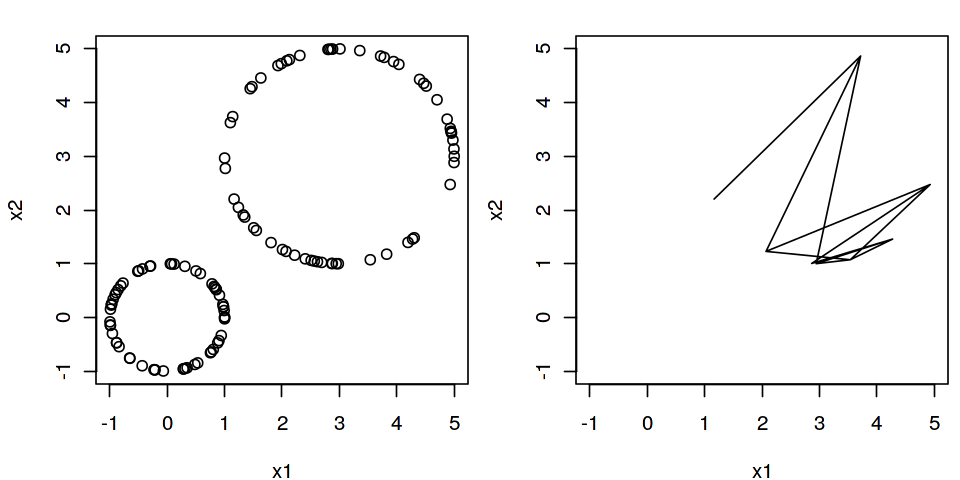

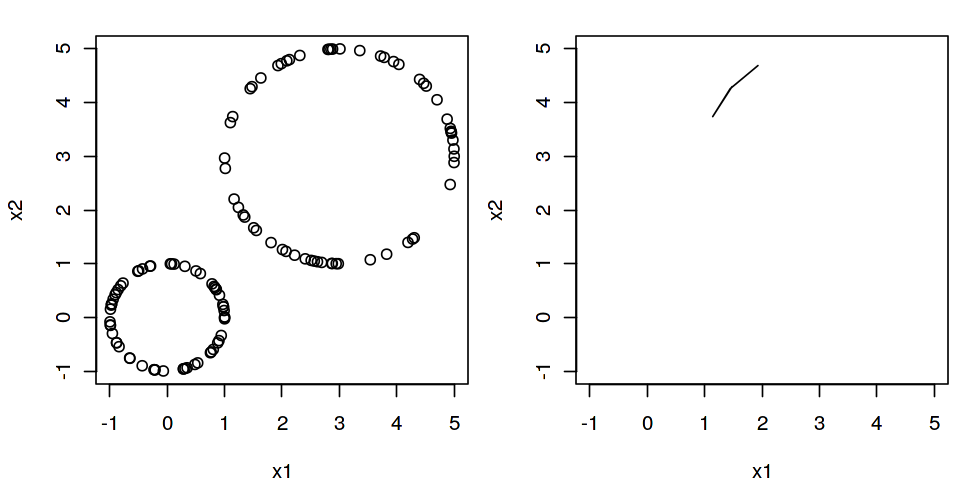

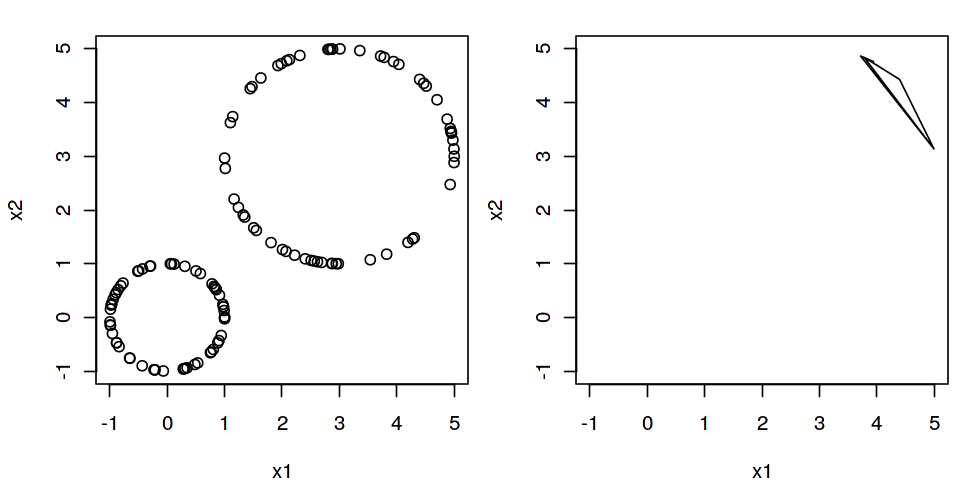

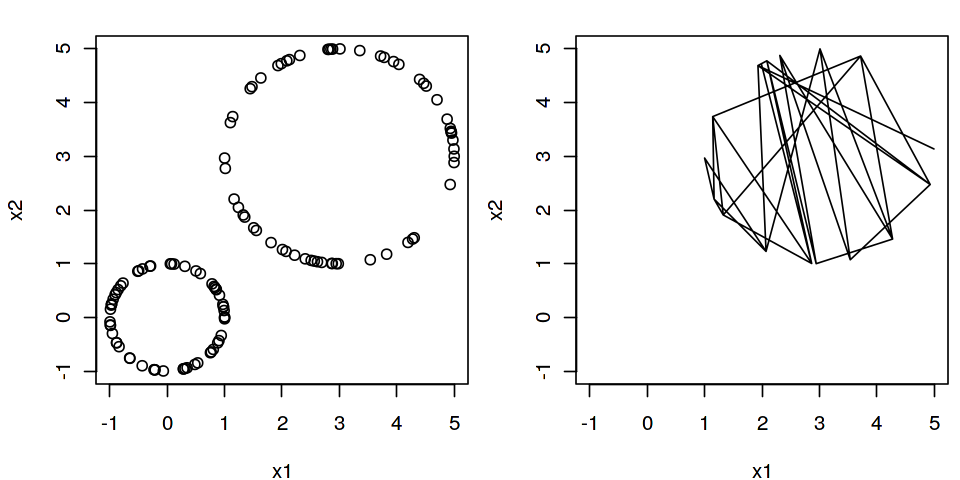

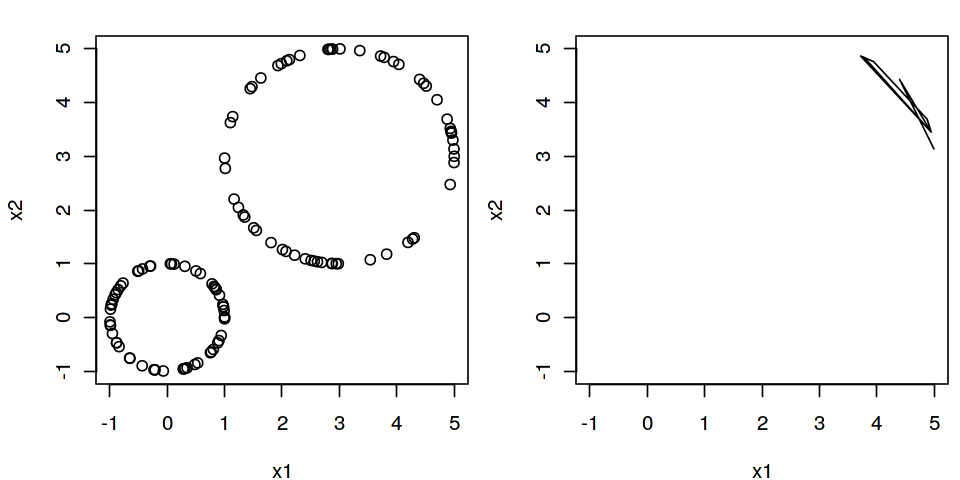

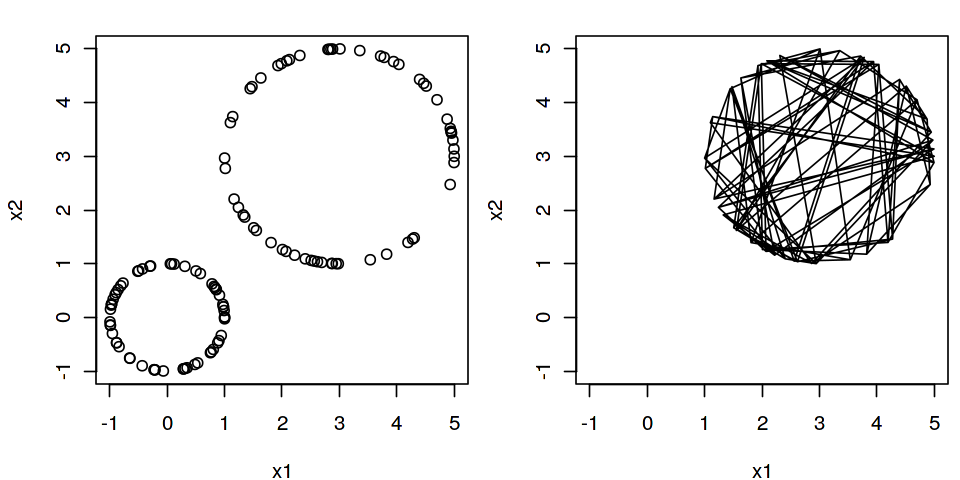

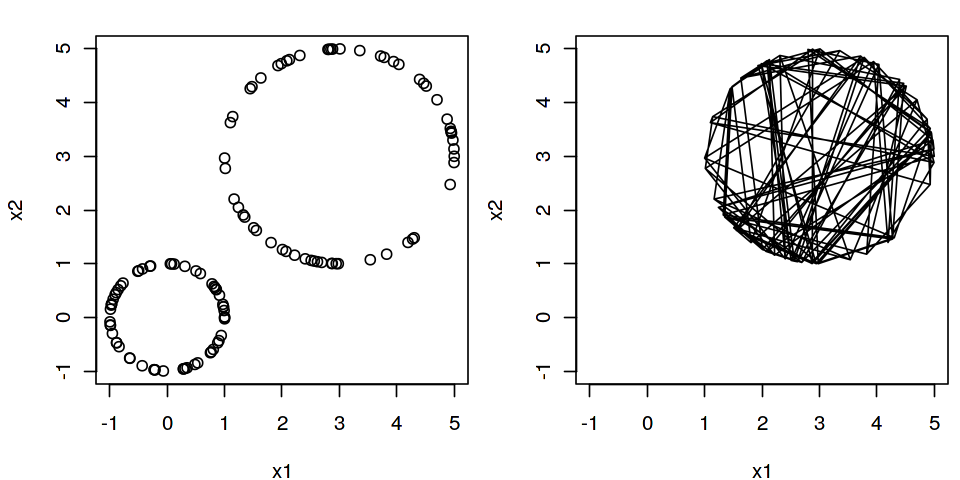

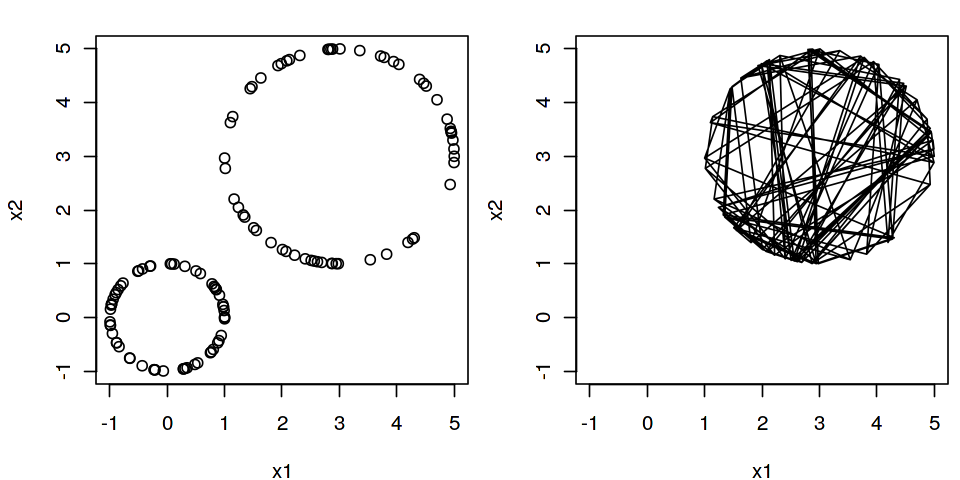

In [40]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(Circles, xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
    }
    
}

x.hull,y.hull
4.30343167,1.48307354
4.27488226,1.45900187
4.19473738,1.39606652
0.53192783,-0.84678969
0.48210831,-0.87611163
0.34688227,-0.93790868
0.31040834,-0.95060332
0.28262696,-0.95922990
0.28245786,-0.95927971
-0.06695285,-0.99775614


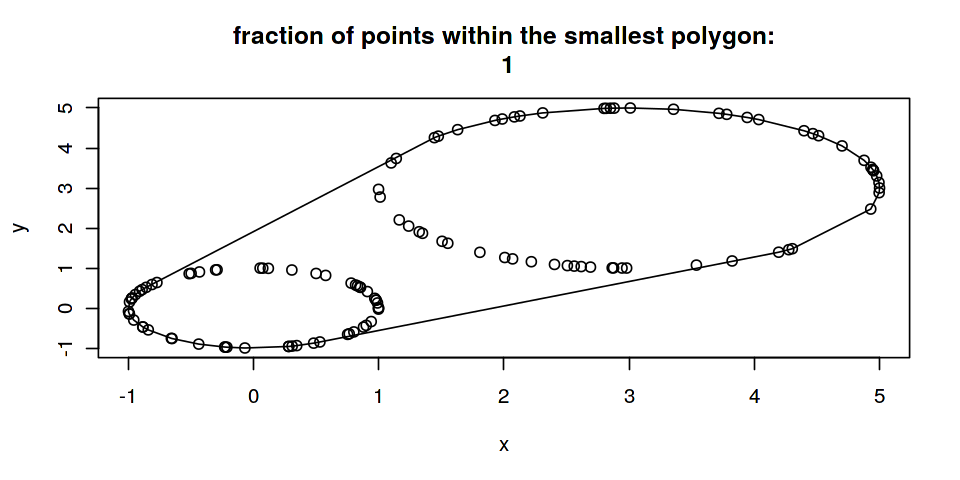

In [46]:
library(aplpack)
#options(repr.plot.width=3, repr.plot.height=3)
#plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plothulls(Circles)

#### Rips filtration
- The following function computes the subset of the rips barcode based on epsilon duration present
- Intake is the output format from ripser and a filtration length value gamma

In [42]:
duration_filter = function(rips_homology,gamma){
    rips_duration = rips_homology[,3]-rips_homology[,2]
    rips_homology2 = cbind(rips_homology,rips_duration)
    g = rips_homology2[,4]>gamma
    rips_homology2 = rips_homology2[g,]
    return(rips_homology2)
}

In [43]:
rip_check = duration_filter(rips_homology,0.5)
print(rip_check)

     dimension    Birth    Death rips_duration
[1,]         0 0.000000 0.502254      0.502254
[2,]         0 0.000000 0.561674      0.561674
[3,]         0 0.000000 0.590860      0.590860
[4,]         0 0.000000 0.602324      0.602324
[5,]         0 0.000000 0.667300      0.667300
[6,]         0 0.000000 1.259280      1.259280
[7,]         1 1.172630 3.469660      2.297030
[8,]         1 0.351523 1.751070      1.399547


#### Rips Computation AND Filtration
- Integrated in one function for ease of use

In [44]:
compute_rips = function(data,maxDim,epsThresh,gamma){
    homology_data = ripserDiag(data,maxDim,epsThresh)
    homology_data = duration_filter(homology_data,gamma)
    return(homology_data)
}

In [45]:
FR = compute_rips(Circles,1,10,0.5)
print(FR)

     dimension    Birth    Death rips_duration
[1,]         0 0.000000 0.502254      0.502254
[2,]         0 0.000000 0.561674      0.561674
[3,]         0 0.000000 0.590860      0.590860
[4,]         0 0.000000 0.602324      0.602324
[5,]         0 0.000000 0.667300      0.667300
[6,]         0 0.000000 1.259280      1.259280
[7,]         1 1.172630 3.469660      2.297030
[8,]         1 0.351523 1.751070      1.399547


#### Nearest Neighbor matching implmentation
- Function: Intake points from alpha filtration and rips complex and match them using a nearest neighbor algorithm
- We intake the RIPS values as p1 and the Alpha values as p2 and perform a matching process to yield the correspondence between the two
- Rips data should generally be filtered before running this function


In [151]:
match_pts = function(p1,p2){
    if (nrow(p1) > nrow(p2)){
        stop('RIPS MATRIX MUST CONTAIN FEWER FEATURES',call = TRUE, domain == NULL)
        geterrormessage()
    }
    
    #create a matrix in which to store distance values
    dx = matrix(,nrow(p1),nrow(p2))
    for (i in 1:nrow(p1)){
        for (j in 1:nrow(p2)){
            dx[i,j] = sqrt((p2[j,1]-p1[i,1])^2+(p2[j,2]-p1[i,2])^2)
        }
    }
   
    #create a matrix to store the match list
    store_match = matrix(,nrow(p1),1)
    for (i in 1:nrow(p1)){
        store_match[i,1]=which.min(dx[i,])
    }
    
    #reassign and return values
    f1 = p1
    f2 = p2[store_match,]
    out = list("Set1",f1,"Set2",f2,"MatchIx",store_match)
    return(out)
    
}

In [154]:
g1 = matrix(c(1,4,8,1,4,8),nrow=3,ncol=2)
g2 = matrix(c(1,9,4,1,2,8,5,1),nrow=4,ncol=2)
print(g1)
print(g2)
out = match_pts(g1,g2)
print(out)

     [,1] [,2]
[1,]    1    1
[2,]    4    4
[3,]    8    8
     [,1] [,2]
[1,]    1    2
[2,]    9    8
[3,]    4    5
[4,]    1    1
NULL
NULL
